In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

📈 Statistiques sur monthly_income :
count    366214.000000
mean       6066.886279
std        3251.106714
min        1583.333333
25%        3833.333333
50%        5391.666667
75%        7500.000000
max       26150.183333
Name: monthly_income, dtype: float64


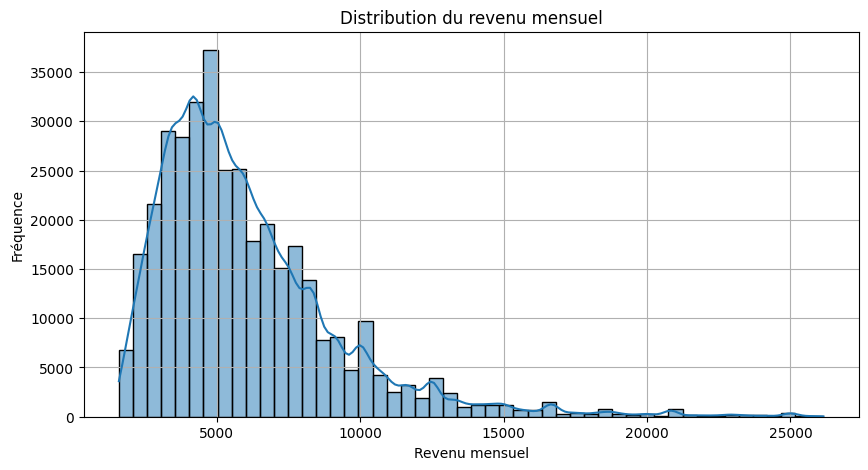


🔢 Quartiles :
 0.25    3833.333333
0.50    5391.666667
0.75    7500.000000
Name: monthly_income, dtype: float64

📊 Répartition des CSP :
csp_category
CSP+     98342
CSP-     93294
CSP      89820
CSP++    84758
Name: count, dtype: int64


In [ ]:
# 📂 Chargement des données
input_path = "../../data/processed/dataset_clean_no_outliers.parquet"
df = pd.read_parquet(input_path)

# 🔍 Aperçu des revenus mensuels
print("📈 Statistiques sur monthly_income :")
print(df['monthly_income'].describe())

# 📊 Visualisation de la distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['monthly_income'], bins=50, kde=True)
plt.title("Distribution du revenu mensuel")
plt.xlabel("Revenu mensuel")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# 🧮 Définition des catégories CSP par quartiles
quartiles = df['monthly_income'].quantile([0.25, 0.5, 0.75])
print("\n🔢 Quartiles :\n", quartiles)

def get_csp(income):
    if income <= quartiles[0.25]:
        return 'CSP-'
    elif income <= quartiles[0.5]:
        return 'CSP'
    elif income <= quartiles[0.75]:
        return 'CSP+'
    else:
        return 'CSP++'

# 🏷️ Attribution des CSP
df['csp_category'] = df['monthly_income'].apply(get_csp)

# 📊 Répartition
print("\n📊 Répartition des CSP :")
print(df['csp_category'].value_counts())

In [5]:
# 📏 Définition manuelle des seuils CSP selon le graphique
def categorize_csp(income):
    if income < 3000:
        return 'CSP-'
    elif income < 6000:
        return 'CSP'
    elif income < 8000:
        return 'CSP+'
    else:
        return 'CSP++'

df['csp_category'] = df['monthly_income'].apply(categorize_csp)

# 🧾 Distribution
print("📊 Répartition des CSP (affinée) :")
print(df['csp_category'].value_counts())

📊 Répartition des CSP (affinée) :
csp_category
CSP      176573
CSP++     74594
CSP+      74195
CSP-      40852
Name: count, dtype: int64
